In [1]:
# Import API key
weather_api_key="d0cb7612d8e4acdc7e895ce9b00e46a3"

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [7]:
 output_data_file ="C:/Users/User/Api Homework/Cities.csv"

In [8]:
# Range of latitudes and longitudes
lat_range = (-90, 90)

lng_range = (-180, 180)

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

990

In [23]:
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = weather_api_key


query_url = f"{url}appid={key}&units={units}&q="

response = requests.get(query_url + city).json()
response

{'coord': {'lon': 168.33, 'lat': -46.6},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 53.01,
  'feels_like': 44.02,
  'temp_min': 53.01,
  'temp_max': 53.01,
  'pressure': 1010,
  'humidity': 82},
 'wind': {'speed': 15.01, 'deg': 240, 'gust': 25.01},
 'rain': {'3h': 0.25},
 'clouds': {'all': 100},
 'dt': 1584831321,
 'sys': {'type': 3,
  'id': 2008959,
  'country': 'NZ',
  'sunrise': 1584816682,
  'sunset': 1584860144},
 'timezone': 46800,
 'id': 2206939,
 'name': 'Bluff',
 'cod': 200}

In [24]:
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        id = response['id']
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print (f"{city} ID: {id} has been pulled from Open Weather Map")
    except (KeyError, IndexError):
        country.append(None)
        date.append(None)
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        print(f"{city} not found, going to keep going!")

rikitea ID: 4030556 has been pulled from Open Weather Map
broome ID: 5110365 has been pulled from Open Weather Map
amderma not found, going to keep going!
bundaberg ID: 2173323 has been pulled from Open Weather Map
mount isa ID: 2065594 has been pulled from Open Weather Map
barrow ID: 5880054 has been pulled from Open Weather Map
mys shmidta not found, going to keep going!
lucapa ID: 145724 has been pulled from Open Weather Map
atuona ID: 4020109 has been pulled from Open Weather Map
cidreira ID: 3466165 has been pulled from Open Weather Map
punta arenas ID: 3874787 has been pulled from Open Weather Map
ushuaia ID: 3833367 has been pulled from Open Weather Map
castro ID: 3466704 has been pulled from Open Weather Map
east london ID: 1006984 has been pulled from Open Weather Map
kodiak ID: 5866583 has been pulled from Open Weather Map
batemans bay ID: 2176639 has been pulled from Open Weather Map
sinnamary ID: 3380290 has been pulled from Open Weather Map
pangody ID: 1495626 has been pul

carnarvon ID: 2074865 has been pulled from Open Weather Map
cabo san lucas ID: 3985710 has been pulled from Open Weather Map
puerto cabello ID: 3629706 has been pulled from Open Weather Map
asau ID: 686090 has been pulled from Open Weather Map
pevek ID: 2122090 has been pulled from Open Weather Map
narsaq ID: 3421719 has been pulled from Open Weather Map
norman wells ID: 6089245 has been pulled from Open Weather Map
kununurra ID: 2068110 has been pulled from Open Weather Map
vardo ID: 777019 has been pulled from Open Weather Map
eureka ID: 5563397 has been pulled from Open Weather Map
kushmurun ID: 1519924 has been pulled from Open Weather Map
mehamn ID: 778707 has been pulled from Open Weather Map
airai ID: 1651810 has been pulled from Open Weather Map
upernavik ID: 3418910 has been pulled from Open Weather Map
kavieng ID: 2094342 has been pulled from Open Weather Map
rio grande ID: 3451138 has been pulled from Open Weather Map
isangel ID: 2136825 has been pulled from Open Weather Map

tonj ID: 365763 has been pulled from Open Weather Map
nanortalik ID: 3421765 has been pulled from Open Weather Map
longview ID: 4707814 has been pulled from Open Weather Map
juru ID: 1772148 has been pulled from Open Weather Map
siilinjarvi ID: 636947 has been pulled from Open Weather Map
chase ID: 5920381 has been pulled from Open Weather Map
saldanha ID: 3361934 has been pulled from Open Weather Map
ambon ID: 1651531 has been pulled from Open Weather Map
abu kamal ID: 174448 has been pulled from Open Weather Map
goderich ID: 5962442 has been pulled from Open Weather Map
vytegra ID: 469960 has been pulled from Open Weather Map
tura ID: 1254046 has been pulled from Open Weather Map
xadani not found, going to keep going!
ossora ID: 2122389 has been pulled from Open Weather Map
flic en flac ID: 934517 has been pulled from Open Weather Map
schneeberg ID: 2837470 has been pulled from Open Weather Map
thilogne not found, going to keep going!
saint george ID: 5546220 has been pulled from Ope

gap ID: 3016701 has been pulled from Open Weather Map
nuuk ID: 3421319 has been pulled from Open Weather Map
burnie ID: 2173125 has been pulled from Open Weather Map
saint anthony ID: 5044290 has been pulled from Open Weather Map
karratha ID: 6620339 has been pulled from Open Weather Map
camopi ID: 3382226 has been pulled from Open Weather Map
kumba ID: 2229752 has been pulled from Open Weather Map
dolbeau not found, going to keep going!
canico ID: 2270258 has been pulled from Open Weather Map
warrington ID: 2634739 has been pulled from Open Weather Map
provideniya ID: 4031574 has been pulled from Open Weather Map
santa vitoria do palmar ID: 3449747 has been pulled from Open Weather Map
viedma ID: 3832899 has been pulled from Open Weather Map
salym ID: 1493162 has been pulled from Open Weather Map
touros ID: 3386213 has been pulled from Open Weather Map
saint-tite ID: 6139154 has been pulled from Open Weather Map
kalmar ID: 2702261 has been pulled from Open Weather Map
hay river ID: 59

kamenka ID: 553766 has been pulled from Open Weather Map
komsomolsk ID: 6559559 has been pulled from Open Weather Map
lieksa ID: 648090 has been pulled from Open Weather Map
maneadero ID: 3996737 has been pulled from Open Weather Map
rock island ID: 4907907 has been pulled from Open Weather Map
okha ID: 2122614 has been pulled from Open Weather Map
honningsvag ID: 779554 has been pulled from Open Weather Map
gatbo ID: 1713131 has been pulled from Open Weather Map
hamilton ID: 4513583 has been pulled from Open Weather Map
lolua not found, going to keep going!
longhua ID: 1802618 has been pulled from Open Weather Map
baneh ID: 141584 has been pulled from Open Weather Map
porto novo ID: 2392087 has been pulled from Open Weather Map
la rioja ID: 3336897 has been pulled from Open Weather Map
sistranda ID: 3139597 has been pulled from Open Weather Map
shingu ID: 1847947 has been pulled from Open Weather Map
natal ID: 3394023 has been pulled from Open Weather Map
mamallapuram ID: 1263997 has 

mound ID: 5038348 has been pulled from Open Weather Map
churapcha ID: 2025241 has been pulled from Open Weather Map
naron ID: 3115739 has been pulled from Open Weather Map
phan thiet ID: 1571058 has been pulled from Open Weather Map
kamloops ID: 5989045 has been pulled from Open Weather Map
iwanai ID: 2129868 has been pulled from Open Weather Map
puksoozero ID: 504187 has been pulled from Open Weather Map
la asuncion ID: 3480908 has been pulled from Open Weather Map
taupo ID: 2181742 has been pulled from Open Weather Map
qatana ID: 165929 has been pulled from Open Weather Map
waipawa ID: 2206874 has been pulled from Open Weather Map
jiddah not found, going to keep going!
kolaras ID: 1266302 has been pulled from Open Weather Map
arteaga ID: 4018128 has been pulled from Open Weather Map
yerbogachen ID: 2012956 has been pulled from Open Weather Map
port-gentil ID: 2396518 has been pulled from Open Weather Map
kuche not found, going to keep going!
kodinsk ID: 1503037 has been pulled from O

hamm ID: 2911240 has been pulled from Open Weather Map
vega de alatorre ID: 3514843 has been pulled from Open Weather Map
kavaratti ID: 1267390 has been pulled from Open Weather Map
luena ID: 3347719 has been pulled from Open Weather Map
turukhansk ID: 1488903 has been pulled from Open Weather Map
emet ID: 315639 has been pulled from Open Weather Map
balykshi not found, going to keep going!
broken hill ID: 2173911 has been pulled from Open Weather Map
karaul not found, going to keep going!
mogok ID: 1308937 has been pulled from Open Weather Map
price ID: 5545269 has been pulled from Open Weather Map
linxia ID: 1803331 has been pulled from Open Weather Map
port-cartier ID: 6111696 has been pulled from Open Weather Map
pangnirtung ID: 6096551 has been pulled from Open Weather Map
toliary not found, going to keep going!
assen ID: 2759633 has been pulled from Open Weather Map
saleaula not found, going to keep going!
concordia ID: 3435261 has been pulled from Open Weather Map
methoni ID: 25

In [34]:
DataFrame= pd.DataFrame({'City':cities,'Cloudiness':cloudiness,'Country':country,'Date':date,'Humidity':humidity,
                       'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind Speed':wind_speed})

DataFrame.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,3.0,PF,1.584831e+09,76.0,-23.12,-134.97,79.18,7.90
1,broome,1.0,US,1.584831e+09,52.0,42.25,-75.83,37.00,4.70
2,amderma,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3,bundaberg,39.0,AU,1.584832e+09,83.0,-24.85,152.35,75.20,6.93
4,mount isa,1.0,AU,1.584831e+09,34.0,-20.73,139.50,82.40,6.93


In [35]:
DF = pd.read_csv("C:/Users/User/api-homework/DataFrame4_Output.csv")
DF

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,rikitea,3.0,PF,1.584831e+09,76.0,-23.12,-134.97,79.18,7.90
1,1,broome,1.0,US,1.584831e+09,52.0,42.25,-75.83,37.00,4.70
2,2,amderma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,bundaberg,39.0,AU,1.584832e+09,83.0,-24.85,152.35,75.20,6.93
4,4,mount isa,1.0,AU,1.584831e+09,34.0,-20.73,139.50,82.40,6.93
...,...,...,...,...,...,...,...,...,...,...
983,985,dholka,75.0,IN,1.584832e+09,54.0,22.72,72.47,78.80,3.36
984,986,comodoro rivadavia,100.0,AR,1.584832e+09,31.0,-45.87,-67.50,77.00,28.86
985,987,kargil,97.0,IN,1.584832e+09,84.0,34.57,76.10,12.94,3.51
986,988,omsukchan,100.0,RU,1.584832e+09,92.0,62.53,155.80,2.86,5.79


In [36]:
DF2=DF[['Country','Max Temp']]
DF2

,Country,Max Temp
0,PF,79.18
1,US,37.00
2,NaN,NaN
3,AU,75.20
4,AU,82.40
...,...,...
983,IN,78.80
984,AR,77.00
985,IN,12.94
986,RU,2.86


In [37]:
DF3=DF2[DF2["Country"].isin(["RU","US","HN","JP","LT"])]
DF3

,Country,Max Temp
1,US,37.00
5,US,6.80
14,US,39.20
17,RU,-10.10
18,US,42.01
...,...,...
968,RU,17.26
973,RU,6.28
979,RU,14.56
981,RU,15.10


In [43]:
DF4=DF3.groupby('Country')['Max Temp'].agg('mean')
DF4

Country
HN    79.720000
JP    55.405263
LT    29.500000
RU    15.403333
US    53.188800
Name: Max Temp, dtype: float64

In [44]:
DF5 = pd.DataFrame(DF3.groupby("Country").count())

DF5["Max Temp Mean"] = pd.DataFrame(DF3.groupby("Country")["Max Temp"].mean())



DF5 = DF5[["Max Temp Mean"]]
DF5

,Max Temp Mean
Country,
HN,79.720000
JP,55.405263
LT,29.500000
RU,15.403333
US,53.188800


,Max Temp Mean,CC,Country
Country,,,
HN,79.720000,Hungary,Hungary
JP,55.405263,Japan,Japan
LT,29.500000,Lithuania,Lithuania
RU,15.403333,Russia,Russia
US,53.188800,United States,United States


In [48]:
DF5['Country']=['Hungary','Japan','Lithuania','Russia','United States']
DF5

,Max Temp Mean,CC,Country
Country,,,
HN,79.720000,Hungary,Hungary
JP,55.405263,Japan,Japan
LT,29.500000,Lithuania,Lithuania
RU,15.403333,Russia,Russia
US,53.188800,United States,United States


In [49]:
DF5.drop(['CC'], inplace=True, axis = 1)

In [50]:
DF5

,Max Temp Mean,Country
Country,,
HN,79.720000,Hungary
JP,55.405263,Japan
LT,29.500000,Lithuania
RU,15.403333,Russia
US,53.188800,United States


In [51]:
DF6=DF5.sort_values('Max Temp Mean', ascending=False)
DF6

,Max Temp Mean,Country
Country,,
HN,79.720000,Hungary
JP,55.405263,Japan
US,53.188800,United States
LT,29.500000,Lithuania
RU,15.403333,Russia


(0, 89.72)

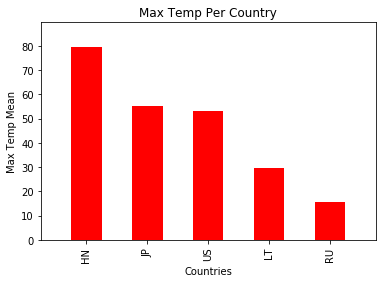

In [54]:
# Set x axis and tick locations
x_axis = np.arange(len(DF6))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, DF6["Max Temp Mean"], color = "r", width = .5)
plt.xticks(tick_locations, DF6.index.values, rotation="vertical")
plt.title("Max Temp Per Country")
plt.xlabel("Countries")
plt.ylabel("Max Temp Mean")
# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(DF6["Max Temp Mean"])+10)

In [57]:
DF2=DF[['Country','City']]
DF2

,Country,City
0,PF,rikitea
1,US,broome
2,NaN,amderma
3,AU,bundaberg
4,AU,mount isa
...,...,...
983,IN,dholka
984,AR,comodoro rivadavia
985,IN,kargil
986,RU,omsukchan


In [58]:
DF3=DF2[DF2["Country"].isin(["US"])]
DF3

,Country,City
1,US,broome
5,US,barrow
14,US,kodiak
18,US,albany
22,US,kapaa
...,...,...
921,US,safford
924,US,truth or consequences
933,US,marquette
962,US,cocoa


In [2]:
#We want to probe the hypothesis that low temperatures brings more suicides numbers.
#But the sample has not too many cities to be an accurate representation of the real temperature. 